# Import necessary libraries

In [26]:
%matplotlib inline

from sklearn.datasets import load_digits

import numpy as np 
import matplotlib.pyplot as plt
#import cv2
import warnings

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics, neighbors
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from scipy.misc.pilutil import imresize

import matplotlib.pylab as plt
warnings.filterwarnings("ignore")

# Load Digits dataset

In [27]:
digits = load_digits()

print(digits.data.shape)
# These are the labels
print(digits.target.shape)

(1797, 64)
(1797,)


# Show sample digit

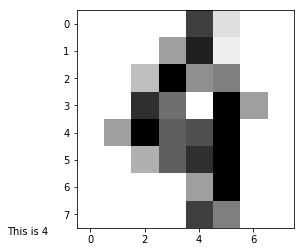

[[ 0.  0.  0.  0. 12.  2.  0.  0.]
 [ 0.  0.  0.  6. 14.  1.  0.  0.]
 [ 0.  0.  4. 16.  7.  8.  0.  0.]
 [ 0.  0. 13.  9.  0. 16.  6.  0.]
 [ 0.  6. 16. 10. 11. 16.  0.  0.]
 [ 0.  0.  5. 10. 13. 16.  0.  0.]
 [ 0.  0.  0.  0.  6. 16.  0.  0.]
 [ 0.  0.  0.  0. 12.  8.  0.  0.]]


In [28]:
fig = plt.figure()
plt.imshow(digits.images[24],cmap = plt.cm.gray_r)
txt = "This is %d"%digits.target[24]
fig.text(0.1,0.1,txt)
plt.show()
print(digits.images[24])

# Split dataset into training and testing

In [29]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=0)

# Fit and predict with logistic regression, measure accuracy with test dataset

In [30]:
print('Result with logistic regression')
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)
y_pred = logisticRegr.predict(x_test)
print(classification_report(y_test, y_pred))

Result with logistic regression
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        27
          1       0.89      0.89      0.89        35
          2       0.97      0.94      0.96        36
          3       0.91      1.00      0.95        29
          4       0.97      1.00      0.98        30
          5       0.97      0.97      0.97        40
          6       0.98      0.98      0.98        44
          7       1.00      0.95      0.97        39
          8       0.88      0.90      0.89        39
          9       0.95      0.90      0.92        41

avg / total       0.95      0.95      0.95       360



# Fit and predict with linear SVM, measure accuracy with test dataset

In [31]:
print('Result with linear SVM')
linearsvm = SVC()
linearsvm.fit(x_train, y_train)
y_pred = linearsvm.predict(x_test)
print(classification_report(y_test, y_pred))

Result with linear SVM
             precision    recall  f1-score   support

          0       1.00      0.67      0.80        27
          1       1.00      0.17      0.29        35
          2       1.00      0.25      0.40        36
          3       0.11      1.00      0.19        29
          4       1.00      0.50      0.67        30
          5       1.00      0.15      0.26        40
          6       1.00      0.39      0.56        44
          7       1.00      0.23      0.38        39
          8       0.00      0.00      0.00        39
          9       1.00      0.20      0.33        41

avg / total       0.82      0.33      0.37       360



# Linear SVM with different parameters

In [32]:
print('Result with linear SVM with gamma 0.001')
linearsvm = SVC(gamma=0.001)
linearsvm.fit(x_train, y_train)
y_pred = linearsvm.predict(x_test)
print(classification_report(y_test, y_pred))

Result with linear SVM with gamma 0.001
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        27
          1       0.97      1.00      0.99        35
          2       1.00      1.00      1.00        36
          3       1.00      1.00      1.00        29
          4       1.00      1.00      1.00        30
          5       0.97      0.97      0.97        40
          6       1.00      1.00      1.00        44
          7       1.00      1.00      1.00        39
          8       1.00      0.97      0.99        39
          9       0.98      0.98      0.98        41

avg / total       0.99      0.99      0.99       360



# Classification using K-NN

In [33]:
print('Result with K-NN')
knn = neighbors.KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(classification_report(y_test, y_pred))

Result with K-NN
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        27
          1       0.97      0.97      0.97        35
          2       1.00      0.97      0.99        36
          3       0.91      1.00      0.95        29
          4       1.00      0.97      0.98        30
          5       0.95      0.97      0.96        40
          6       1.00      1.00      1.00        44
          7       0.95      1.00      0.97        39
          8       1.00      0.90      0.95        39
          9       0.98      0.98      0.98        41

avg / total       0.98      0.97      0.97       360



# Predict on a new 8*8 digit image from MSPaint

[[0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1. 0. 0.]]
Predicted number is = [1]


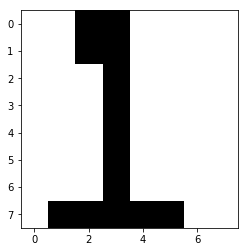

In [37]:
from scipy import misc
import imageio
from skimage import io

hand_image = io.imread('handwritten_digit.png', as_grey=True)
hand_image_1 = 1 - hand_image
plt.imshow(hand_image_1, cmap = plt.cm.gray_r)
print(hand_image_1)

flattened_image = hand_image_1.flatten()
reshaped_image = flattened_image.reshape(1, 64)
y_pred = linearsvm.predict(reshaped_image)
print("Predicted number is =", y_pred)

#from PIL import Image
#import numpy as np
#im_frame = Image.open('handwritten_digit.png')
#np_frame = np.array(im_frame.getdata())
#import os
#import matplotlib.pyplot as plt
#import cv2
# Load using matplotlib
#images_plt = plt.imread('handwritten_digit.png')
# convert your lists into a numpy array of size (N, H, W, C)
#images = np.array(images_plt)
#print(images.shape)             
# Load using opencv
#images_cv = cv2.imread('handwritten_digit.png') 
# convert your lists into a numpy array of size (N, C, H, W)
#images = np.array(images_cv)
#pixels = images.flatten().reshape(8, 8)
#print(pixels.shape)